In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold,train_test_split
from sklearn.linear_model import Lasso,LinearRegression,LogisticRegression
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,mean_squared_error,precision_score,recall_score,roc_auc_score
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import scipy
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('mpp.csv')

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.shape

(2000, 21)

In [5]:
df=df.drop('blue',axis=1)

In [6]:
df.isnull().sum()

battery_power    0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   dual_sim       2000 non-null   int64  
 3   fc             2000 non-null   int64  
 4   four_g         2000 non-null   int64  
 5   int_memory     2000 non-null   int64  
 6   m_dep          2000 non-null   float64
 7   mobile_wt      2000 non-null   int64  
 8   n_cores        2000 non-null   int64  
 9   pc             2000 non-null   int64  
 10  px_height      2000 non-null   int64  
 11  px_width       2000 non-null   int64  
 12  ram            2000 non-null   int64  
 13  sc_h           2000 non-null   int64  
 14  sc_w           2000 non-null   int64  
 15  talk_time      2000 non-null   int64  
 16  three_g        2000 non-null   int64  
 17  touch_screen   2000 non-null   int64  
 18  wifi    

In [8]:
!pip install mlxtend

# feature selection

In [9]:
df.corr()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
clock_speed,0.011482,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399
pc,0.031441,-0.005245,-0.017143,0.644595,-0.005598,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,-0.001322,-0.008742,0.005389,0.033599


<AxesSubplot:>

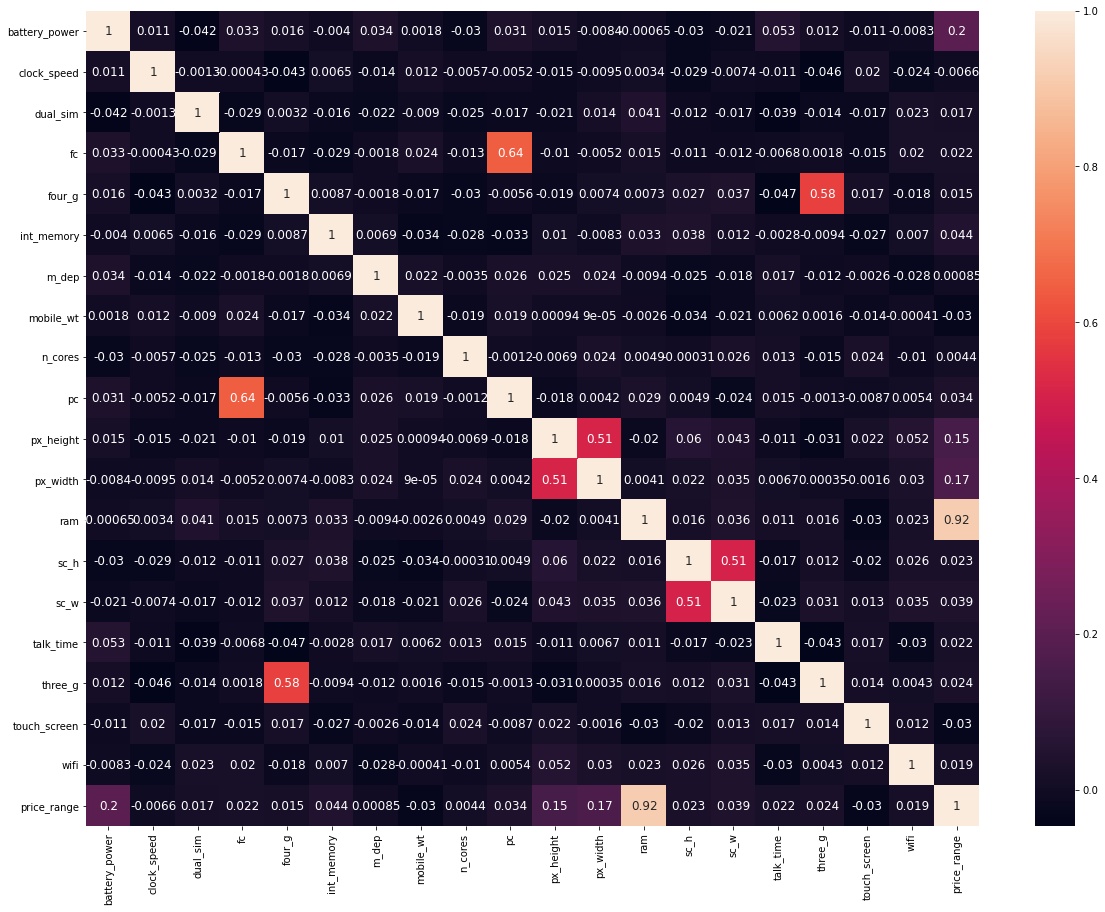

In [10]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,annot_kws = {'size': 12})

In [11]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [12]:
x.shape

(2000, 19)

In [13]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [14]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=18, forward=False, verbose=1, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(x, y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 18/18

In [15]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names) #it return that it sele

['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [16]:
new_data = df[feat_names]
new_data.head()


,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,0,1
1,1021,0.5,1,0,1,53,0.7,136,6,905,1988,2631,17,3,7,1,1,0
2,563,0.5,1,2,1,41,0.9,145,6,1263,1716,2603,11,2,9,1,1,0
3,615,2.5,0,0,0,10,0.8,131,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1.2,0,13,1,44,0.6,141,14,1208,1212,1411,8,2,15,1,1,0


In [17]:
chii2=SelectKBest(score_func=chi2,k='all')
chi=chii2.fit(df[['wifi','touch_screen','dual_sim','fc','four_g','three_g']],df[['price_range']])

In [18]:
chi.scores_

array([ 0.42209073,  1.92842942,  0.63101079, 10.13516649,  1.52157239,
        0.32764281])

In [19]:
listt=df[['battery_power','int_memory','px_height','px_width','ram','talk_time']]
sc=StandardScaler()
for i in listt:
    df[i]=sc.fit_transform(df[[i]])
    print(df[i])

0      -0.902597
1      -0.495139
2      -1.537686
3      -1.419319
4       1.325906
          ...   
1995   -1.011860
1996    1.653694
1997    1.530773
1998    0.622527
1999   -1.658331
Name: battery_power, Length: 2000, dtype: float64
0      -1.380644
1       1.155024
2       0.493546
3      -1.215274
4       0.658915
          ...   
1995   -1.656260
1996    0.383299
1997    0.217930
1998    0.769162
1999    0.714039
Name: int_memory, Length: 2000, dtype: float64
0      -1.408949
1       0.585778
2       1.392684
3       1.286750
4       1.268718
          ...   
1995    1.300273
1996    0.608317
1997    0.502383
1998   -0.696707
1999   -0.365380
Name: px_height, Length: 2000, dtype: float64
0      -1.146784
1       1.704465
2       1.074968
3       1.236971
4      -0.091452
          ...   
1995    1.477661
1996    1.651235
1997    0.880565
1998   -1.345816
1999   -1.151413
Name: px_width, Length: 2000, dtype: float64
0       0.391703
1       0.467317
2       0.441498
3       0.594

<AxesSubplot:>

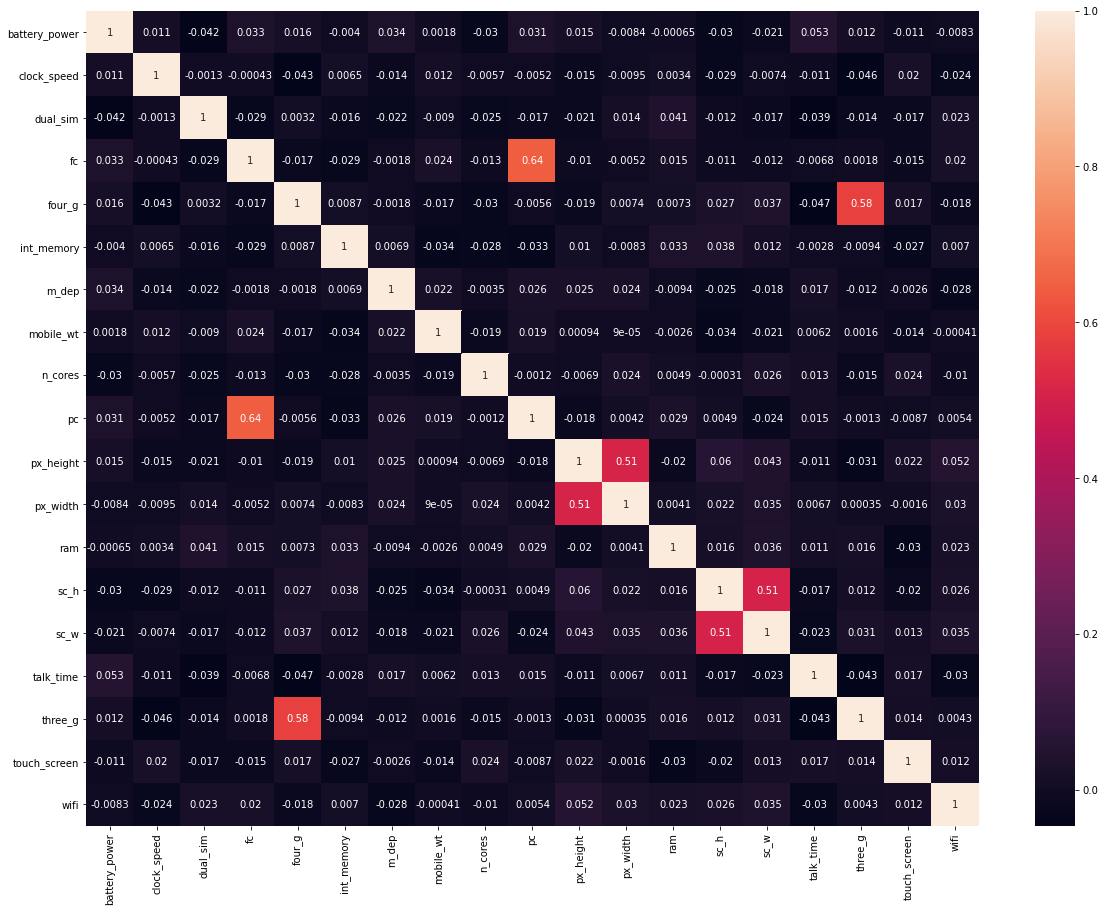

In [20]:
plt.subplots(figsize=(20,15))
sns.heatmap(x.corr(),annot=True)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
len(x_train),len(y_train),len(x_test),len(y_test)

(1400, 1400, 600, 600)

In [23]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [24]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC()
bc=BaggingClassifier()

In [25]:
l=[lr,dt,rf,svm,bc]
for i in l:
    i.fit(x_train,y_train)

C:\Users\gajsr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
lrpre=lr.predict(x_test)
dtpre=dt.predict(x_test)
rfpre=rf.predict(x_test)
svmpre=svm.predict(x_test)
bcpre=bc.predict(x_test)

In [27]:
print(classification_report(y_test,lrpre))
print(confusion_matrix(y_test,lrpre))
print(recall_score(y_test,lrpre,average='macro'))
print(precision_score(y_test,lrpre,average='macro'))
print(accuracy_score(y_test,lrpre))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       151
           1       0.52      0.53      0.53       146
           2       0.52      0.53      0.53       148
           3       0.69      0.75      0.72       155

    accuracy                           0.64       600
   macro avg       0.64      0.63      0.64       600
weighted avg       0.64      0.64      0.64       600

[[110  40   1   0]
 [ 24  77  35  10]
 [  1  27  79  41]
 [  0   3  36 116]]
0.6345112405060007
0.639103481253618
0.6366666666666667


In [28]:
print(classification_report(y_test,dtpre))
print(confusion_matrix(y_test,dtpre))
print(recall_score(y_test,dtpre,average='macro'))
print(precision_score(y_test,dtpre,average='macro'))
print(accuracy_score(y_test,dtpre))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       151
           1       0.74      0.80      0.77       146
           2       0.74      0.73      0.73       148
           3       0.87      0.85      0.86       155

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.82      0.81      0.81       600

[[131  20   0   0]
 [ 13 117  15   1]
 [  0  22 108  18]
 [  0   0  23 132]]
0.8125655412108518
0.8148673729134299
0.8133333333333334


In [29]:
print(classification_report(y_test,rfpre))
print(confusion_matrix(y_test,rfpre))
print(recall_score(y_test,rfpre,average='macro'))
print(precision_score(y_test,rfpre,average='macro'))
print(accuracy_score(y_test,rfpre))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       151
           1       0.82      0.85      0.84       146
           2       0.80      0.78      0.79       148
           3       0.91      0.90      0.91       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

[[144   7   0   0]
 [ 10 124  12   0]
 [  0  20 115  13]
 [  0   0  16 139]]
0.8691896682936311
0.8687316191128496
0.87


In [30]:
print(classification_report(y_test,svmpre))
print(confusion_matrix(y_test,svmpre))
print(recall_score(y_test,svmpre,average='macro'))
print(precision_score(y_test,svmpre,average='macro'))
print(accuracy_score(y_test,svmpre))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.91      0.99      0.95       146
           2       0.94      0.91      0.92       148
           3       0.97      0.95      0.96       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600

[[146   5   0   0]
 [  1 144   1   0]
 [  0   9 134   5]
 [  0   0   7 148]]
0.9533582255410953
0.9538929793109375
0.9533333333333334


In [31]:
print(classification_report(y_test,bcpre))
print(confusion_matrix(y_test,bcpre))
print(recall_score(y_test,bcpre,average='macro'))
print(precision_score(y_test,bcpre,average='macro'))
print(accuracy_score(y_test,bcpre))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       151
           1       0.78      0.94      0.85       146
           2       0.84      0.76      0.80       148
           3       0.92      0.88      0.90       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.88      0.87      0.87       600

[[137  14   0   0]
 [  7 137   2   0]
 [  0  24 112  12]
 [  0   0  19 136]]
0.8699542610477372
0.8738175534557113
0.87


In [32]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knnpre=knn.predict(x_test)
print(classification_report(y_test,knnpre))
print(confusion_matrix(y_test,knnpre))
print(recall_score(y_test,knnpre,average='macro'))
print(precision_score(y_test,knnpre,average='macro'))
print(accuracy_score(y_test,knnpre))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       151
           1       0.88      0.92      0.90       146
           2       0.89      0.86      0.87       148
           3       0.94      0.93      0.94       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

[[145   6   0   0]
 [  6 135   5   0]
 [  0  12 127   9]
 [  0   0  11 144]]
0.9180157002703629
0.9179765501347115
0.9183333333333333


In [33]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)
gnpre=knn.predict(x_test)
print(classification_report(y_test,gnpre))
print(confusion_matrix(y_test,gnpre))
print(recall_score(y_test,gnpre,average='macro'))
print(precision_score(y_test,gnpre,average='macro'))
print(accuracy_score(y_test,gnpre))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       151
           1       0.88      0.92      0.90       146
           2       0.89      0.86      0.87       148
           3       0.94      0.93      0.94       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

[[145   6   0   0]
 [  6 135   5   0]
 [  0  12 127   9]
 [  0   0  11 144]]
0.9180157002703629
0.9179765501347115
0.9183333333333333
